
#**Project 9- Twitter US Airline Sentiment - Problem Statement**


## **Description:**

- **Background and Context**
- Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.
That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

- **Data Description**
  A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

- **Dataset**
The dataset has the following columns:
• tweet_id                                                           
• airline_sentiment                                               
• airline_sentiment_confidence                               
• negativereason                                                   
• negativereason_confidence                                    
• airline                                                                    
• airline_sentiment_gold                                              
• name     
• negativereason_gold 
• retweet_count
• text
• tweet_coord
• tweet_created
• tweet_location 
• user_timezone
 
 
- **Objective** 
    **Learning Outcomes:**
• Basic understanding of text pre-processing.
• What to do after text pre-processing
• Bag of words
• Tf-idf
• Build the classification model.
• Evaluate the Model
 
 Best Practices for the Notebook : 
• The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
• The notebook should be run from start to finish in a sequential manner before submission.
• It is preferable to remove all warnings and errors before submission.




#### The purpose of this analysis is to explore the numerous features and build a classification model where we will be able to tag the rating based on the description and consequently rate them as positive or negative. In this analysis, we will be focusing on score, summary, description and score based sentiment features.



##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers, 
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


In [111]:
!pip install contractions

In [157]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization
import seaborn as sns
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score      

[nltk_data] Downloading package stopwords to C:\Users\Ranjan
[nltk_data]     Mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ranjan
[nltk_data]     Mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ranjan
[nltk_data]     Mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Google Colab Not needed**
from google.colab import drive
drive.mount('/content/drive')

In [113]:
import pandas as pd
data=pd.read_csv('Tweets.csv')

In [114]:
data.shape                                               # print shape of data.

(14640, 15)

In [115]:
data.head(5)                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Tmissing values are not needed to fixedas they a

In [116]:
# let's check for duplicate values in the data
data.duplicated().sum()

36

In [117]:
# drop the duplicated rows 
data.drop_duplicates(keep='first',inplace=True)

In [118]:
data.shape

(14604, 15)

In [119]:
data['airline_sentiment_confidence'].value_counts()

1.0000    10409
0.6667       71
0.6632       35
0.6559       30
0.6596       30
          ...  
0.3913        1
0.7273        1
0.6353        1
0.6260        1
0.3544        1
Name: airline_sentiment_confidence, Length: 1023, dtype: int64

In [120]:
my_min_ind = data['airline_sentiment_confidence'].min()                  # Index of minimum in column
print(my_min_ind)
my_max_ind = data['airline_sentiment_confidence'].max()                  # Index of maximum in column
print(my_max_ind)

0.335
1.0


In [121]:
## checking the column airline_sentiment_confidence & airline_sentiment based on text content 
data[data['airline_sentiment_confidence'] > 0.5].loc[:10,['airline_sentiment_confidence','negativereason_gold','airline_sentiment','text']].head(50)

,airline_sentiment_confidence,negativereason_gold,airline_sentiment,text
0,1.0000,NaN,neutral,@VirginAmerica What @dhepburn said.
2,0.6837,NaN,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,1.0000,NaN,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,1.0000,NaN,negative,@VirginAmerica and it's a really big bad thing about it
5,1.0000,NaN,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,0.6745,NaN,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,0.6340,NaN,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,0.6559,NaN,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,1.0000,NaN,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."
10,0.6769,NaN,neutral,@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24


- It seems that **airline_sentiment** reflects the sentiment aligned to the text content   

data["Sentiment"] = data["Score"].apply(lambda score: "positive" if score > 3 else "negative")                          #Addition of Sentiment column based on Score
data["Usefulness"] = (data["HelpfulnessNumerator"]/data["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "Notuseful")    #Addition of Usefulness column based on helpfullness parameter

In [122]:
# Taking only 1000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping relevant columns from the data, as these are useful for our analysis.

data = data.loc[:10000, ['airline_sentiment_confidence','airline_sentiment','text']]

In [123]:
data.isnull().sum(axis=0)                                # Check for NULL values.

airline_sentiment_confidence    0
airline_sentiment               0
text                            0
dtype: int64

In [124]:
## data['negativereason_gold']=data.negativereason_gold.fillna('NULL')
##data=data.dropna()                                     # Dropping off missing values
data.columns                                           # Print the column of the dataframe

Index(['airline_sentiment_confidence', 'airline_sentiment', 'text'], dtype='object')

In [125]:
data['Text']= data['text']                                     #Shape of the data

In [126]:
data=data.drop(['text'],axis=1)

In [127]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,airline_sentiment_confidence,airline_sentiment,Text
0,1.0000,neutral,@VirginAmerica What @dhepburn said.
1,0.3486,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,0.6837,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,1.0000,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,1.0000,negative,@VirginAmerica and it's a really big bad thing about it


In [128]:
data.shape                                # Shape of data

(10001, 3)

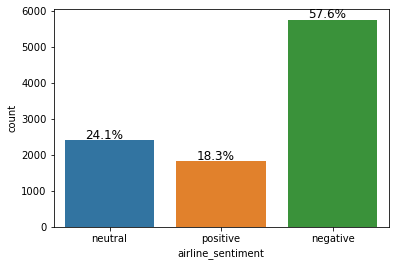

In [158]:
#plot the distribution of the class label
def bar_plot(data, feature):
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(data,'airline_sentiment')

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [129]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment_confidence,airline_sentiment,Text
0,1.0000,neutral,@VirginAmerica What @dhepburn said.
1,0.3486,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,0.6837,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,1.0000,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,1.0000,negative,@VirginAmerica and it's a really big bad thing about it


In [130]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['Text'] = data['Text'].apply(lambda x: replace_contractions(x))
data.head()

,airline_sentiment_confidence,airline_sentiment,Text
0,1.0000,neutral,@VirginAmerica What @dhepburn said.
1,0.3486,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,0.6837,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,1.0000,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,1.0000,negative,@VirginAmerica and it is a really big bad thing about it


In [131]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment_confidence,airline_sentiment,Text
0,1.0000,neutral,@VirginAmerica What @dhepburn said.
1,0.3486,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,0.6837,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,1.0000,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,1.0000,negative,@VirginAmerica and it is a really big bad thing about it


In [132]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data

In [133]:
data.head()                                                                    # Look at how tokenized data looks.

,airline_sentiment_confidence,airline_sentiment,Text
0,1.0000,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,0.3486,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,0.6837,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,1.0000,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,1.0000,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [134]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [138]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data.head()

,airline_sentiment_confidence,airline_sentiment,Text
0,1.0000,neutral,virginamerica dhepburn say
1,0.3486,positive,virginamerica plus add commercials experience tacky
2,0.6837,neutral,virginamerica not today must mean need take another trip
3,1.0000,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,1.0000,negative,virginamerica really big bad thing


### **Word Cloud based on Summary and Score**

In [140]:
pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

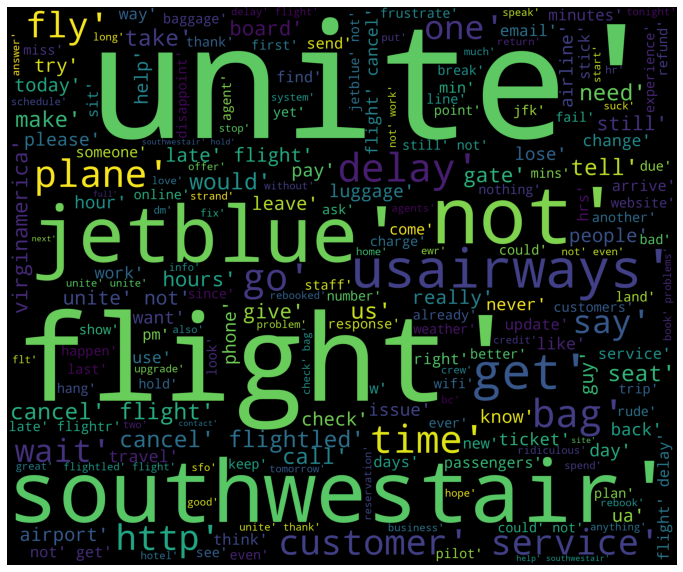

In [151]:
#####################  creating word cloud for negetive Airline sentiment reviews#######################################################
negative_reviews=data[data['airline_sentiment']=="negative"]
words = ' '.join(negative_reviews['Text'].astype(str).tolist())
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

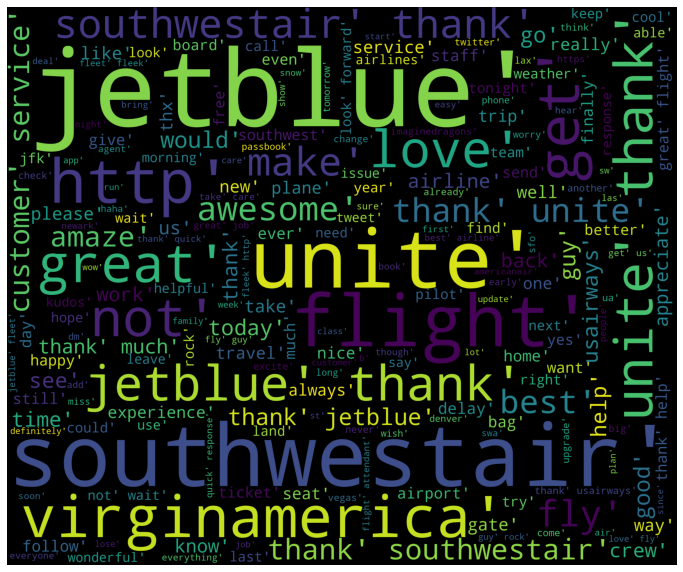

In [152]:
#####################creating word cloud for Positive Airline sentiment reviews############################################################
negative_reviews=data[data['airline_sentiment']=="positive"]
words = ' '.join(negative_reviews['Text'].astype(str).tolist())
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

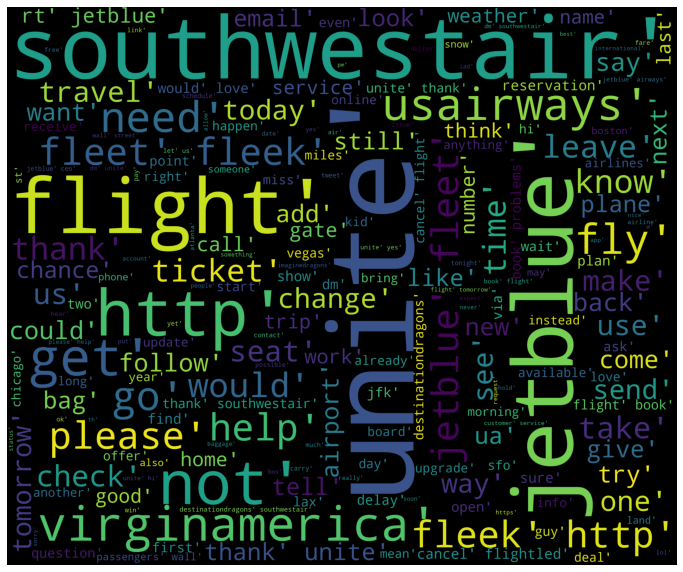

In [155]:
#####################creating word cloud for Neutral Airline sentiment reviews############################################################
negative_reviews=data[data['airline_sentiment']=="neutral"]
words = ' '.join(negative_reviews['Text'].astype(str).tolist())
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Most of the word in the word summary column are positive sentiment in nature
- We can see the most frequent words choosen by consumers to express their sentiment for the products

- Consumers are complaining about taste,product & sharing their experience as horrible , disappoint etc.


- We can see the different degree of sentiment words are used by consumers to express their emotions for high scored rated product.

### **Building the model based on CountVectorizer and Random Forest**

In [163]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=5000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['Text'].astype(str))

data_features = data_features.toarray()                        # Convert the data features to array.

In [164]:
data_features.shape

(10001, 5000)

In [165]:
X = data_features
y = data.airline_sentiment
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42,shuffle=False)

In [169]:
# Finding optimal number of base learners using k-fold CV ->
# Setting up the base lerning from 100 with stepping by 100 with max of 400 
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [170]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())



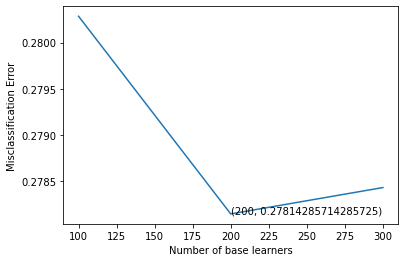

In [171]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

For **CountVectorizer technique and Random Forest model** the optimal base lerners needed is 200 with the lowest misclassification error.

### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [173]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['neutral' , 'positive','negetive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

     neutral       0.83      0.80      0.82      1677
    positive       0.54      0.68      0.60       761
    negetive       0.75      0.55      0.63       563

    accuracy                           0.72      3001
   macro avg       0.71      0.68      0.68      3001
weighted avg       0.74      0.72      0.73      3001

Accuracy of the model is :  0.7240919693435521


[[1320  302   55]
 [ 178  534   49]
 [  81  172  310]]


<AxesSubplot:>

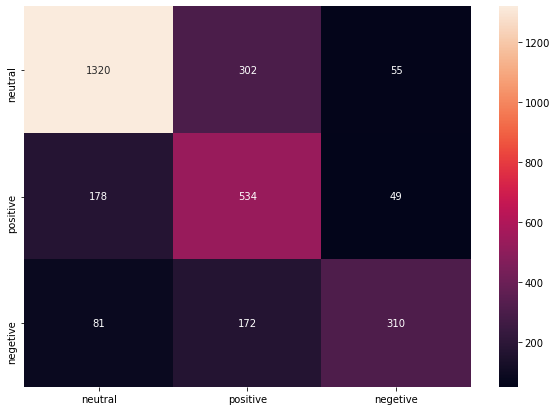

In [189]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['neutral' , 'positive','negetive']],
                  columns = [i for i in ['neutral' , 'positive','negetive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

D:\Programs\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


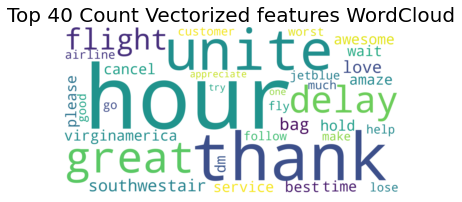

In [187]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
      

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 Count Vectorized features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [191]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=4000)
data_features = vectorizer.fit_transform(data['Text'].astype(str))

data_features = data_features.toarray()

data_features.shape

(10001, 4000)

In [192]:
X = data_features
y = data.airline_sentiment
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42,shuffle=False)

In [193]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

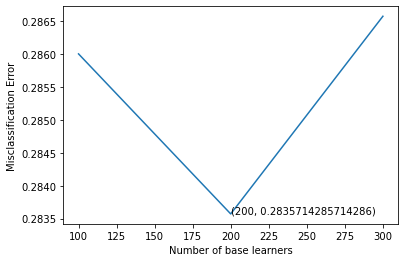

In [194]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [195]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
TDIDF_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,TDIDF_vectorizer_predicted , target_names = ['neutral' , 'positive','negetive']))
print("Accuracy of the model is : ",accuracy_score(y_test,TDIDF_vectorizer_predicted))

              precision    recall  f1-score   support

     neutral       0.80      0.86      0.83      1677
    positive       0.59      0.61      0.60       761
    negetive       0.79      0.55      0.65       563

    accuracy                           0.74      3001
   macro avg       0.73      0.68      0.69      3001
weighted avg       0.74      0.74      0.74      3001

Accuracy of the model is :  0.7414195268243918


[[1448  196   33]
 [ 247  466   48]
 [ 125  127  311]]


<AxesSubplot:>

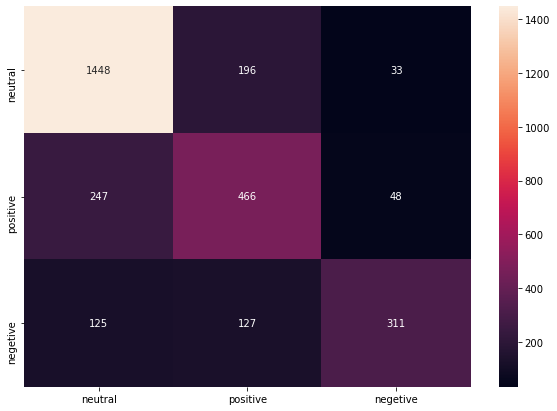

In [196]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
conf_mat = confusion_matrix(y_test, TDIDF_vectorizer_predicted)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['neutral' , 'positive','negetive']],
                  columns = [i for i in ['neutral' , 'positive','negetive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

D:\Programs\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


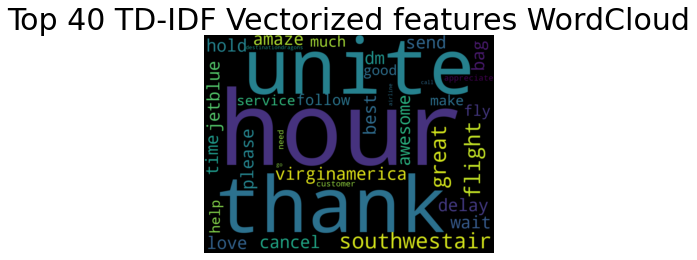

In [197]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 TD-IDF Vectorized features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### **Summary**:

- We used a dataset which has **reviews in text format and their sentiment score on the scale of 1 to 5.**
- The goal was to **build a model for text-classification**.
- We **created the sentiment and usefulness column** based on the score and helpfulness column.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary and high and low score.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- However, **we can still increase the accuracy of our model by increasing the dataset we took into account for the model building** (We've currently only used 50,000 entries out of around 500,000 entries, which means **we built our current model using just 10% of the dataset**) 
- We can also increase the **max_feature parameter** in the vectorizer. 
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.